In [1]:
#Read Data
from google.colab import files
uploaded = files.upload()

Saving Processed_Cow_Data.csv to Processed_Cow_Data.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Processed_Cow_Data.csv']))
df.head()

,CowID,Sick,PARTI_PL,PARTI_PR,ProblemsDry,ProblemsPeripartum,Prob1month,Prob2months,milk_yiled_IQR_post,milk_yiled_IQR_pre,...,LDL_IQR_PRE,LDL_IQR_POST,HDL_IQR_PRE,HDL_IQR_POST,PL_IQR_PRE,PL_IQR_POST,GH_IQR_PRE,GH_IQR_POST,paraox_IQR_PRE,paraox_IQR_POST
0,329,True,1.0,0.0,0,13,13,0,6.0,2.50,...,0.0775,0.270,0.0825,0.59,2.4750,28.160,3.7700,0.720,5.128457,6.064329
1,340,True,0.0,1.0,0,13,13,0,8.0,2.25,...,0.1975,0.080,0.1525,0.01,12.0975,22.150,4.3725,4.820,16.349184,19.443316
2,1107,True,1.0,0.0,0,13,26,0,5.0,4.75,...,0.1175,0.180,0.3050,0.61,16.8025,4.090,5.6025,4.220,11.182202,10.786320
3,116,True,0.0,1.0,0,0,0,0,NaN,10.00,...,0.0450,0.075,0.0800,0.12,2.0050,13.535,14.8750,2.765,4.943215,12.726049
4,117,False,0.0,1.0,13,13,0,0,0.0,1.50,...,0.0625,0.040,0.0600,0.04,27.4900,12.020,2.7175,2.020,6.436574,18.715808


In [3]:
#There is a NAN in data (id 116, ..)
mean_value= df['milk_yiled_IQR_post'].mean()
df['milk_yiled_IQR_post'].fillna(value=mean_value, inplace=True)

**TENTATIVE Analysis**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



In [5]:
df['Sick'].value_counts()

True     24
False    11
Name: Sick, dtype: int64

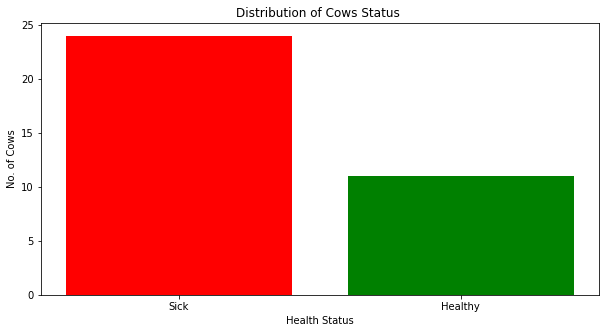

<Figure size 720x1440 with 0 Axes>

In [6]:
# Bar plot of Cows Health Status Distribution
fig = plt.figure(figsize = (10, 5))
plt.bar(['Sick', 'Healthy'],df['Sick'].value_counts(), color= ['red','green'])
plt.xlabel("Health Status")
plt.ylabel("No. of Cows")
plt.title("Distribution of Cows Status ")
plt.figure(figsize=(10,20))

 
plt.show()

In [7]:
#Get X & y (predictor space & response)
random_state = 0
x=df.drop(['Sick'],axis=1)
x=x.drop(['CowID'],axis=1)
y= df['Sick']

In [8]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, stratify=y, random_state=random_state)


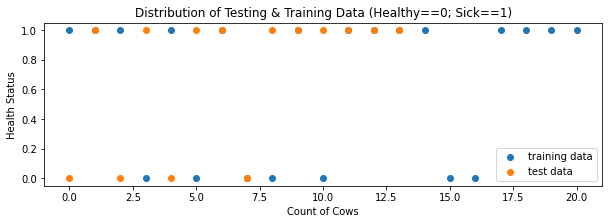

In [9]:
#Check out training anda testing set (mixed)
#Healthy == False == 0
#Sick == True == 1 
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,3))
    x_train=np.arange(0,len(X_train),1)
    x_test=np.arange(0,len(X_test),1)

    plt.scatter(x_train, y_train, label='training data')
    plt.scatter(x_test, y_test, label='test data')
    plt.title('Distribution of Testing & Training Data (Healthy==0; Sick==1)',  loc='center')
    plt.xlabel("Count of Cows")
    plt.ylabel("Health Status")
    plt.legend()


    plt.show()
    
part1_scatter()

| Test Data |  |
| --- | --- |
| Sick | 10 | 
| Healthy | 4 | 

| Train Data |  |
| --- | --- |
| Sick | 8 | 
| Healthy | 6 | 

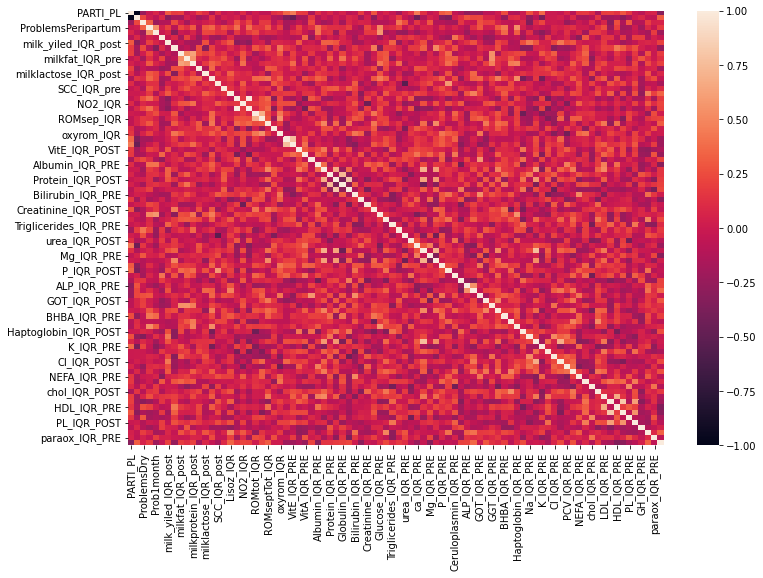

In [10]:
#Correlation analysis
#Correlation Analysis, this is too crowded.Hence, we need to reduce the space. 
import seaborn as sn
corrMatrix=x.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corrMatrix)
plt.show()

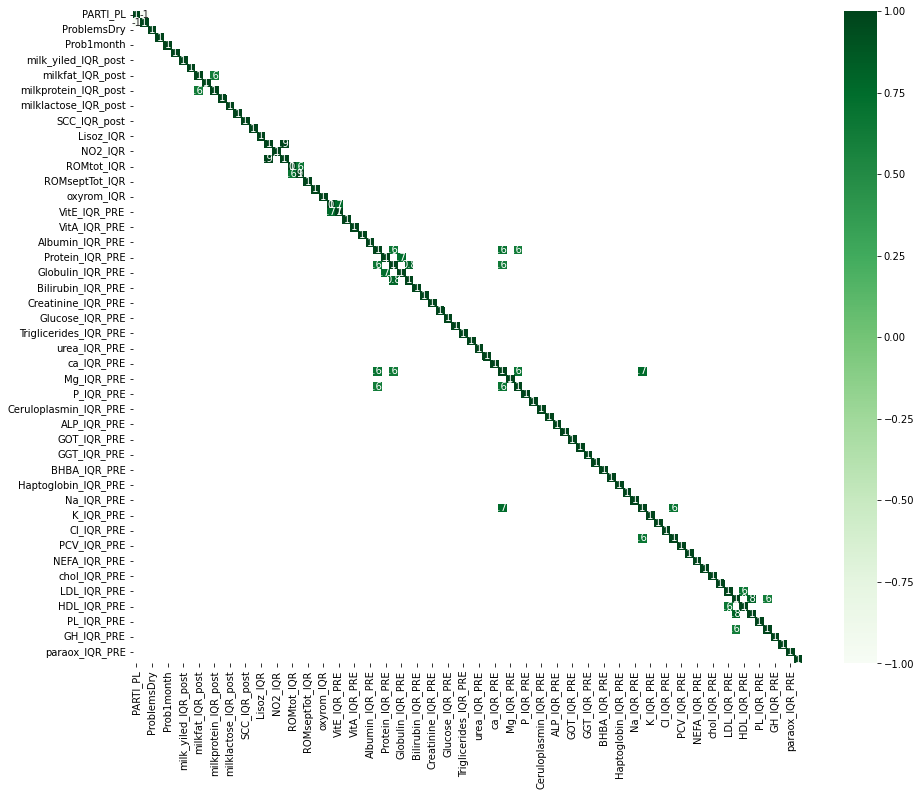

In [11]:
#Only check out correlations > abs(.60)
kot = corrMatrix[(corrMatrix>=.60) | (corrMatrix<= -.60)]
plt.figure(figsize=(15,12))
sn.heatmap(kot, cmap="Greens",annot=True)

In [12]:
#List of top Correlations
all_corr = x.corr().abs().unstack()
top_correlations= (all_corr[(all_corr>0.60) & (all_corr !=1)]).sort_values(ascending=False)

#Remove duplicate & show dataframe
top_corr=top_correlations.to_frame()
top_corr=top_corr.iloc[::2]
top_corr.columns=['(Variable 1,Variable 2): Corr Score']
top_corr

,,"(Variable 1,Variable 2): Corr Score"
NOx_IQR,NO3_IQR,0.994883
HDL_IQR_POST,LDL_IQR_POST,0.815097
Globulin_IQR_POST,Protein_IQR_POST,0.802854
VitEROM_IQR,VitE_IQR_PRE,0.772328
Na_IQR_POST,ca_IQR_POST,0.758712
Protein_IQR_PRE,Globulin_IQR_PRE,0.739035
ROMsep_IQR,ROMtot_IQR,0.690691
Albumin_IQR_POST,ca_IQR_POST,0.690233
ca_IQR_POST,Mg_IQR_POST,0.688879
Na_IQR_POST,Cl_IQR_POST,0.680333


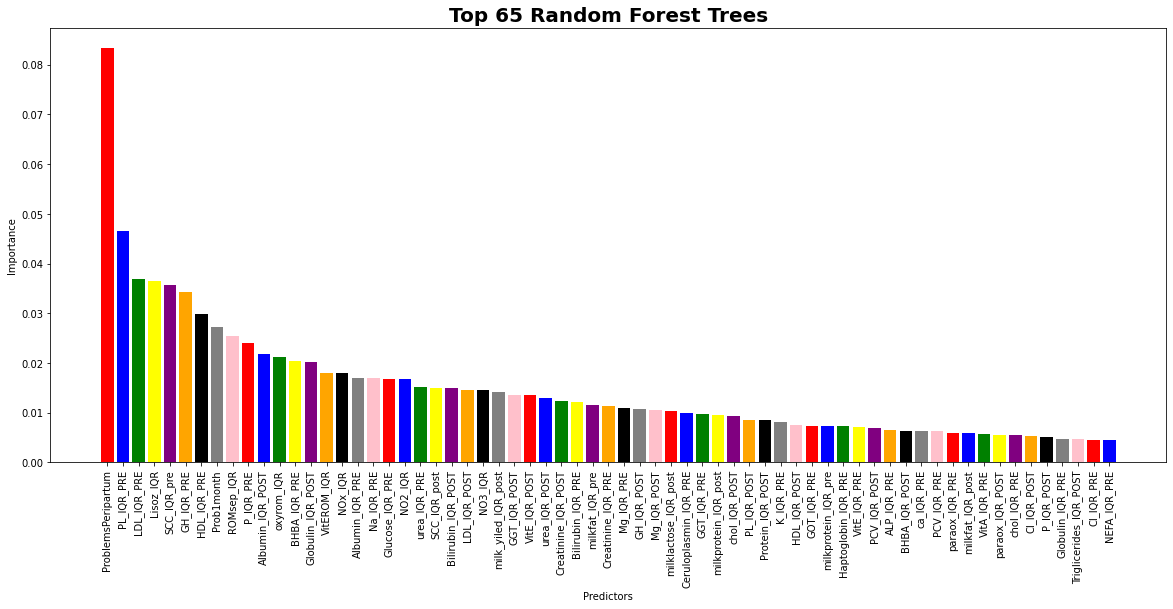

In [ ]:
'''
Feature Selection Description
-----------------------------
There is an attempt to reduce the number of covariates in our final training/testing models. As a result, I've attempted
to perform vairable selection by making use of the feature importances option that is present in random forests,
extra tree classifier, and lasso. The bar graphs are able to show the top 20 fetatures that explain most of the variance present in the data. 
There is some overalp between the variables that are deemed important in all 3 methods. The startegy has been to use these
features in the predictor space to use in the final classification of match. Also, a Lasso model with l1 penalization has been 
used so as to not include in the final model variables that will end up having a coefficient of zero (i.e. not important).

RF vs ET https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/ 
'''

def random_fores_feature_selection(X_train, y_train,X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    
    #Fit model
    clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    
    #Metrics
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    feature_importances= clf.feature_importances_
    
    my_dict = dict(zip(X_train.columns,feature_importances))
    my_dict2= sorted(my_dict, key=my_dict.get, reverse=True)
    top_20_feat=sorted(feature_importances, reverse= True)
    
    return my_dict2[0:65], top_20_feat[0:65]

x2,y =random_fores_feature_selection(X_train, y_train,X_test, y_test)

#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x2, y, color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 65 Random Forest Trees', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')
ax.tick_params(axis='x', labelrotation = 90)

plt.show()


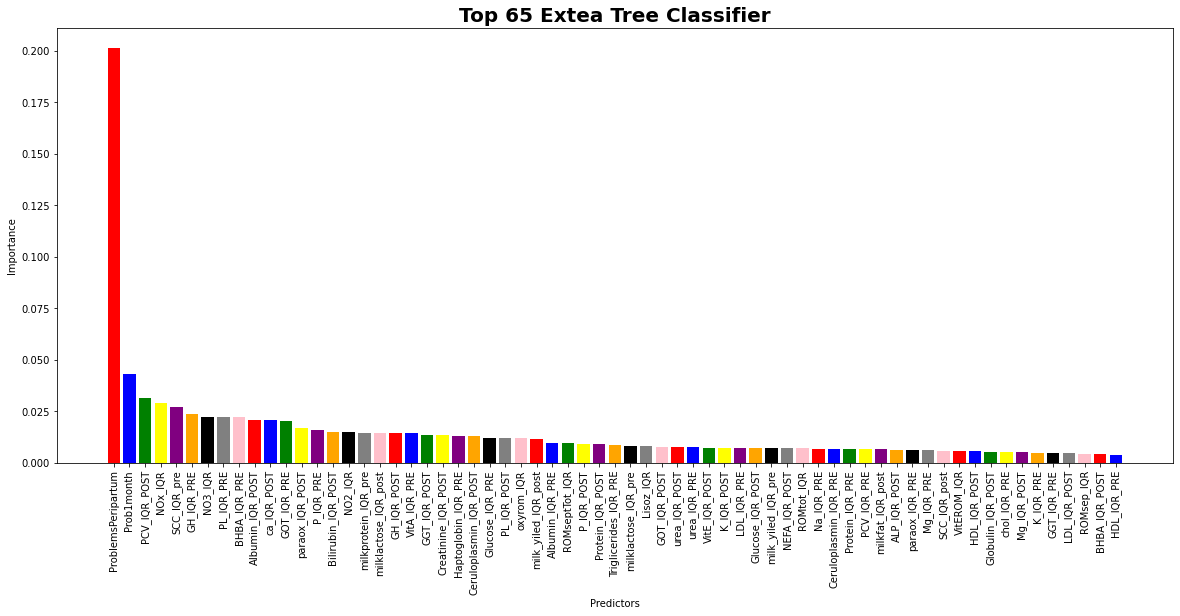

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns,)

a= feat_importances.nlargest(65).to_frame()



#Plots
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(a.index, a[0], color =['red', 'blue', 'green', 'yellow','purple','orange','black','gray','pink'])
ax.set_title('Top 65 Extea Tree Classifier', fontweight='bold', size=20)
ax.set_xlabel('Predictors')
ax.set_ylabel('Importance')
ax.tick_params(axis='x', labelrotation = 90)
plt.show()


In [ ]:
#Take itersection of all outputs
def Intersection(x1,x2): 
    return set(x1).intersection(x2) 
inter= Intersection(list(a.index),x2)
print(len(inter))
print(sorted(list(a.index)))
print(sorted(x2))
pre_inter_df = pd.DataFrame(inter)
print(pre_inter_df)

52
['ALP_IQR_POST', 'Albumin_IQR_POST', 'Albumin_IQR_PRE', 'BHBA_IQR_POST', 'BHBA_IQR_PRE', 'Bilirubin_IQR_POST', 'Ceruloplasmin_IQR_POST', 'Ceruloplasmin_IQR_PRE', 'Creatinine_IQR_POST', 'GGT_IQR_POST', 'GGT_IQR_PRE', 'GH_IQR_POST', 'GH_IQR_PRE', 'GOT_IQR_POST', 'GOT_IQR_PRE', 'Globulin_IQR_POST', 'Glucose_IQR_POST', 'Glucose_IQR_PRE', 'HDL_IQR_POST', 'HDL_IQR_PRE', 'Haptoglobin_IQR_PRE', 'K_IQR_POST', 'K_IQR_PRE', 'LDL_IQR_POST', 'LDL_IQR_PRE', 'Lisoz_IQR', 'Mg_IQR_POST', 'Mg_IQR_PRE', 'NEFA_IQR_POST', 'NO2_IQR', 'NO3_IQR', 'NOx_IQR', 'Na_IQR_PRE', 'PCV_IQR_POST', 'PCV_IQR_PRE', 'PL_IQR_POST', 'PL_IQR_PRE', 'P_IQR_POST', 'P_IQR_PRE', 'Prob1month', 'ProblemsPeripartum', 'Protein_IQR_POST', 'Protein_IQR_PRE', 'ROMsep_IQR', 'ROMseptTot_IQR', 'ROMtot_IQR', 'SCC_IQR_post', 'SCC_IQR_pre', 'Triglicerides_IQR_PRE', 'VitA_IQR_PRE', 'VitEROM_IQR', 'VitE_IQR_POST', 'ca_IQR_POST', 'chol_IQR_PRE', 'milk_yiled_IQR_post', 'milk_yiled_IQR_pre', 'milkfat_IQR_post', 'milklactose_IQR_post', 'milklactos

In [ ]:
'''
Model Selection Description
----------------------------
I have decided to train classifiers based on 
    - Logistic Regression
    - Random Forest
    - Support Vector Machines
    - Decision Tree 

The overall strategy has been that to divide the dataset into training & testing. There is not enough data for validation dataset.
On a high level
    - specified ranges of values for hyper-parameters
    - trained the model on each possible set of hyperparametrs (grid search)
    - Gotten hyper-parametrs of models with highest weighted f1_score
    - Evaluate weighted f1_score Prediction on test set 
    - Pick model that has best weighted f1_score & interpretability 
    
    *Notes 
    #TP, true positive (sick)
    # FN, sick cow, that was mis-labbeled as healthy 
    # FP healthy cow, that was mis-labeled as sick 
    #"How good is it at not mistaking healthy cows as sick?"
    #Not label as sick a cow that is sick (tp/ tp+ fp); ability to not label a healthy cow as sick; correct predicted sick cows/ (correct predicted sick cows+ wrongly predictied sick cows (i.e. healthy))
    #"How good is at identifying sick cows?"
    #Ability to find sick cows (recall) tp/ tp + fn 
    '''

| Model | Accuracy |  f1 (weighted)| Precision (Sick)| Recall (Sick)|Precision (Healthy)| Recall (Healthy)| AUC | 
| --- | --- | --- | --- |--- |--- |---| ---| 
| Logistics Regresion | 0.79 | 0.78 | 0.82 | 0.90 | 0.67 | 0.50 | 0.70
| Random Forest | 0.79 | 0.74 | 0.77 |1.0 | 1.00 | 0.25 | 0.63
| Support Vector Machines | 0.71 | 0.71 | 0.80 |0.80 | 0.50 | 0.50 | 0.65
| Decision Tree Classifier| 0.71 | 0.71 | 0.80 |0.80 | 0.50 | 0.50 | 0.70
| K-Nearest Neighbour|  0.64 |  0.65 |0.78 | 0.70| 0.40 |  0.50|0.60



In [13]:
#Confusion Matrix
def con_matrix(pred, title):
  confusion_matrix = metrics.confusion_matrix(y_test, pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Healthy', 'Sick'])
  cm_display.plot()
  cm_display.ax_.set_title(title)
  plt.show()

In [14]:
# -------------------- Logistic Regression ---------------------------
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


#Regularization
C_list = [0.001, 0.01,0.1, 1, 2, 3, 5, 10, 50, 100, 200,300,500, 1000]
penalty_list= ['l1','l2', 'elasticnet', 'none']
solver_list= ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']
tuned_parameters = [{'penalty': penalty_list, 'solver': solver_list, 'C': C_list}]

#Logistics
logistic = LogisticRegression()
clf = GridSearchCV(logistic, tuned_parameters, refit=False, scoring='f1_micro')

#Fit grid search
best_model = clf.fit(X_train, y_train)

#View best hyperparameters
print(best_model.best_params_)


{'C': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [15]:
#Best Model Logistics: fit, prediction
model = LogisticRegression().set_params(**best_model.best_params_).fit(X_train, y_train)
logr_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, logr_pred))
print(roc_auc_score(y_test, logr_pred))

              precision    recall  f1-score   support

       False       0.67      0.50      0.57         4
        True       0.82      0.90      0.86        10

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

0.7


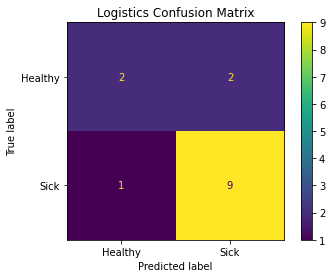

In [17]:
con_matrix(logr_pred, "Logistics Confusion Matrix")

In [20]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

#Parameters
# Number of trees in random forest
n_estimators = [1,50,100,150,]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 3,5,10,30,40]

max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestClassifier()

model = GridSearchCV(estimator = rf, param_grid = param, cv=3,
                          refit=False, n_jobs = -1, verbose = 2,scoring='f1_micro' )

# Fit the random search model
model.fit(X_train, y_train)

model.best_params_

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1}

In [28]:
#Best Random Forest Model Random Forest: fit, prediction
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)       
#.set_params(**model.best_params_)                     
rfc= clf.predict(X_test)

In [29]:
print(classification_report(y_test, rfc))
print(roc_auc_score(y_test, rfc))

              precision    recall  f1-score   support

       False       1.00      0.25      0.40         4
        True       0.77      1.00      0.87        10

    accuracy                           0.79        14
   macro avg       0.88      0.62      0.63        14
weighted avg       0.84      0.79      0.74        14

0.625


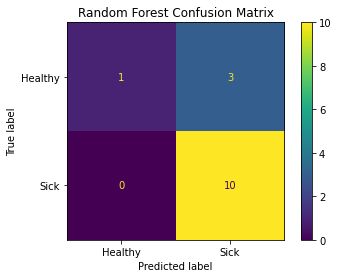

In [30]:
con_matrix(rfc, "Random Forest Confusion Matrix")

In [31]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

import operator

# Regularization / manual grid search
X_train_scaled = (X_train)
X_test_scaled = (X_test)
scores = {}
for this_kernel in ['linear', 'rbf']:
    for this_gamma in [0.1, 0.5, 1, 5, 10]:
        for this_C in [0.1, 0.5, 1, 5, 10]:
            clf = SVC(kernel=this_kernel, gamma=this_gamma, C=this_C)
            scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1_micro'))
            
best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]
print(best_kernel, best_gamma, best_C )

linear 0.1 0.1


In [32]:
#Best SVM Model: fit, prediction
the_svc= SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)
the_pred=the_svc.predict(X_test_scaled)

In [34]:
print(classification_report(y_test, the_pred))
print(roc_auc_score(y_test, the_pred))

              precision    recall  f1-score   support

       False       0.50      0.50      0.50         4
        True       0.80      0.80      0.80        10

    accuracy                           0.71        14
   macro avg       0.65      0.65      0.65        14
weighted avg       0.71      0.71      0.71        14

0.65


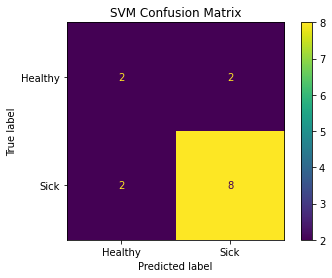

In [ ]:
con_matrix(the_pred, "SVM Confusion Matrix")

In [ ]:
#Descisoin Tree Classifier 
from sklearn.tree import DecisionTreeClassifier    
scores = {}

for c in ['gini', 'entropy', 'log_loss']:
  for s in ['best', 'random']:
    for m in ['auto', 'sqrt', 'log2']:
      for md in [None, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]:
        for mss in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]:
          for msl in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]:
            clf_dtc = DecisionTreeClassifier(criterion=c, 
                                             splitter=s, 
                                             max_features= m, 
                                             max_depth= md,
                                             min_samples_split=mss,
                                             min_samples_leaf=msl)
            scores[(c, s, m, md, mss, msl)] = np.mean(cross_val_score(clf_dtc, X_train, y_train, cv=5, scoring='f1_micro'))
best_c, best_s, best_m, best_md, best_mss, best_mls= max(scores.items(), key=operator.itemgetter(1))[0]

print(best_c, best_s, best_m,best_md, best_mss, best_mls)

gini best auto None 1 1


In [52]:
#Best DTC Model: fit, prediction
from sklearn.tree import DecisionTreeClassifier    
clf_dtc = DecisionTreeClassifier().fit(X_train, y_train)
'''
criterion=best_c,
                                 splitter=best_s, 
                                 max_features= best_m, 
                                 max_depth= best_md,
                                 min_samples_split=2,
                                min_samples_leaf=best_mls
'''
#Prediction
dtc_pred= clf_dtc.predict(X_test)

In [53]:
print(classification_report(y_test, dtc_pred))
print(roc_auc_score(y_test, dtc_pred))

              precision    recall  f1-score   support

       False       0.67      0.50      0.57         4
        True       0.82      0.90      0.86        10

    accuracy                           0.79        14
   macro avg       0.74      0.70      0.71        14
weighted avg       0.77      0.79      0.78        14

0.7


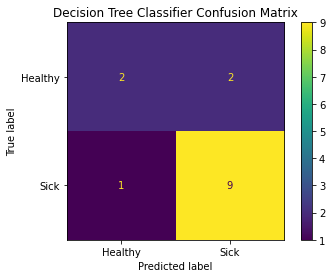

In [54]:
con_matrix(dtc_pred, "Decision Tree Classifier Confusion Matrix")

In [55]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

#Regularization
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16 ]
weights= ['uniform ','distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

temp = {}

#Hyperparameter tuning 
for n in n_neighbors:
  for w in weights:
    for a in algorithm:
      for l in leaf_size:
      
        #KNN
        knn = KNeighborsClassifier(n_neighbors=n, weights= w, algorithm=a, leaf_size=l)
        temp[(n, w,a,l)] = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_micro'))
       
best_n, best_w, best_a, best_l= max(temp.items(), key=operator.itemgetter(1))[0]

       
print(best_n, best_w, best_a, best_l)

1 uniform  auto 1


In [60]:
#KNN best model parameters: fit & prediction
knn= KNeighborsClassifier(algorithm=best_a, leaf_size= best_l,n_neighbors=best_n, weights= 'uniform'). fit(X_train,y_train)
knn_score= knn.predict(X_test)

In [61]:
print(classification_report(y_test, knn_score))
print(roc_auc_score(y_test, knn_score))

              precision    recall  f1-score   support

       False       0.40      0.50      0.44         4
        True       0.78      0.70      0.74        10

    accuracy                           0.64        14
   macro avg       0.59      0.60      0.59        14
weighted avg       0.67      0.64      0.65        14

0.6


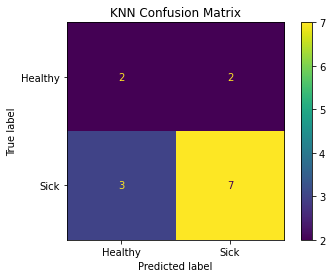

In [62]:
con_matrix(knn_score, "KNN Confusion Matrix")

#Further Things to do 
- *Attempt SVD, this will allow for a smaller subset of predictors to be used. 
- Attempt an analysis that only uses the PRE_PREDICTORS- meaning the predictors pre partum, and see what the results would be. 

- Remove hihgly correlated  variables (which one should depend upon expert input) 

- Only use top predictors (e.g. top 50) for modeling. 

